# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD12
Członkowie: Izabela Karczewska 409957, Natalia Kołodziejczyk 409695, Natalia Kubańska 411933

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 2/2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca informacje niezbędne do wykreślenia funkcji gęstości prawdopodobieństwa wykorzystywanego w teście rozkładu
        teoretycznego - index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę z wartościami
        gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    statistic: float
        Wartość statystyki testowej wyliczonej na podstawie próby losowej.
    rejection_region: list
        Lista zawierająca trzy elementy pozwalające na określenie obszaru krytycznego w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf[pdf_name]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)

### Dane do zadań

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku zadaniach i komórkach testowych wykonaj obie poniższe komórki.

In [4]:
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [5]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5.12, scale=0.25, size=23, random_state=19), columns=["X"])
test_data_2.head()

,X
0,5.175251
1,5.034884
2,4.975563
3,5.018992
4,4.969178


In [6]:
test_data_3 = pd.DataFrame()
test_data_3["A1"] = [1802, 1992, 1854, 1880, 1761, 1900]
test_data_3["A2"] = [1664, 1755, 1823, 1862, np.nan, np.nan]
test_data_3["A3"] = [1877, 1710, 1882, 1720, 1950, np.nan]
test_data_3

,A1,A2,A3
0,1802,1664.0,1877.0
1,1992,1755.0,1710.0
2,1854,1823.0,1882.0
3,1880,1862.0,1720.0
4,1761,NaN,1950.0
5,1900,NaN,NaN


In [7]:
test_data_4 = pd.DataFrame()
test_data_4["B1"] = np.hstack([sp.stats.norm.rvs(0.03, 1.5, 38, random_state=17), np.full(12, np.NaN)])
test_data_4["B2"] = np.hstack([sp.stats.norm.rvs(0.42, 1.5, 45, random_state=43), np.full(5, np.NaN)])
test_data_4["B3"] = np.hstack([sp.stats.norm.rvs(-0.12, 1.5, 42, random_state=14), np.full(8, np.NaN)])
test_data_4["B4"] = sp.stats.norm.rvs(0.06, 1.5, 50, random_state=18)
test_data_4["B5"] = np.hstack([sp.stats.norm.rvs(-0.39, 1.5, 43, random_state=123), np.full(7, np.NaN)])
test_data_4["B6"] = np.hstack([sp.stats.norm.rvs(0.12, 1.5, 39, random_state=13), np.full(11, np.NaN)])
test_data_4.head()

,B1,B2,B3,B4,B5,B6
0,0.444399,0.806100,2.207009,0.179143,-2.018446,-0.948586
1,-2.751942,-0.942722,-0.001221,3.345304,1.106018,1.250650
2,0.965852,-0.147755,0.140965,-0.142338,0.034468,0.053245
3,1.747967,-0.382373,-0.228505,0.300777,-2.649442,0.797719
4,1.585786,1.707110,-3.126494,0.724047,-1.257900,2.137653


### Zadanie 1: Weryfikacja hipotezy o wartości oczekiwanej metodą bootstrap [7 pkt]

Przygotuj funkcję `bootstrap_mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej metodą bootstrap i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Uwagi do wykonania zadania:
 - Automatyczne testy zakładają losowanie prób wg następującego schematu - kolejne próby są losowane w pętli for, a funkcja losująca próbę (np. `pd.sample()`) w kolejnych losowaniach ma ustawioną wartość parametru odpowiadającego za ziarno generatora liczb losowych na wartość `random_state`, `random_state+1`, `random_state+2` itd. 
 - Celem zadania jest napisanie funkcji od podstaw, w rozwiązaniu nie należy korzystać z gotowych funkcji służących do estymacji bootstrapowej.

In [8]:
def bootstrap_mean_NHST(data, H0, H1, number_of_samples, alpha, random_state):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    pvalue: float
        Prawdopodobieństwo otrzymania bardziej ekstremalnej wartości statystyki testowej (w kierunku hipotezy alternatywnej)
        względem wartości otrzymanej na podstawie próby losowej.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    n = len(data)
    mean_data = data.X.mean()
    bootstrap_population = data  + H0 - mean_data
    
    means = np.array([])
    
    for i in range(number_of_samples):
        sample = bootstrap_population.sample(n, random_state = random_state + i, replace = True)
        means = np.append(means,sample.mean())


    if H1 == 'two-sided':
        pvalue = np.mean(np.abs(means - H0) >= np.abs(mean_data - H0))
    elif H1 == 'less':
        pvalue = np.mean(means <= mean_data)
    else:
        pvalue = np.mean(means >= mean_data)

    H = pvalue <= alpha
    return pvalue, H
        

In [9]:
# Komórka testowa
assert np.all(np.isclose(bootstrap_mean_NHST(test_data_1, 5.08, "two-sided", 1000, 0.05, 10), (0.055, 0)))
assert np.all(np.isclose(bootstrap_mean_NHST(test_data_1, 5.08, "less", 2000, 0.05, 12), (0.025, 1)))
assert np.all(np.isclose(bootstrap_mean_NHST(test_data_1, 5.08, "greater", 1500, 0.1, 15), (0.974, 0)))

### Zadanie 2: Weryfikacja hipotezy o dwóch wartościach oczekiwanych metodą bootstrap [7 pkt]

Przygotuj funkcję `bootstrap_means_NHST()`, która będzie weryfikować hipotezę o dwóch wartościach przeciętnych metodą bootstrap i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Uwagi do wykonania zadania:
 - Automatyczne testy zakładają losowanie prób wg następującego schematu - kolejne próby są losowane w pętli for, a funkcja losująca próbę (np. `pd.sample()`) w kolejnych losowaniach ma ustawioną wartość parametru odpowiadającego za ziarno generatora liczb losowych na wartość `random_state` `random_state+2`, `random_state+4` itd. (pierwsza próba) oraz `random_state+1` `random_state+3`, `random_state+5` itd. (druga próba).
 - Celem zadania jest napisanie funkcji od podstaw, w rozwiązaniu nie należy korzystać z gotowych funkcji służących do estymacji bootstrapowej.

In [10]:
def bootstrap_means_NHST(data1, data2, H1, number_of_samples, alpha, random_state):
    """
    Parameters
    -------
    data1: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami pierwszej próby losowej.
    data2: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami drugiej próby losowej.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna populacji, z których zostały pobrane próby jest różna,
        - less: wartość przeciętna populacji, z której została pobrana druga próba jest mniejsza,
        - greater: wartość przeciętna populacji, z której została pobrana druga próba jest większa,
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    pvalue: float
        Prawdopodobieństwo otrzymania bardziej ekstremalnej wartości statystyki testowej (w kierunku hipotezy alternatywnej)
        względem wartości otrzymanej na podstawie próby losowej.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    delta_m = data1.X.mean() - data2.X.mean()
    n1 = len(data1)
    n2 = len(data2)
    delta_est = np.array([])
    bootstrap_population = pd.concat([data1, data2], ignore_index=True)

    for i in range(number_of_samples):
        sample_1 = bootstrap_population.sample(n1, random_state = random_state + 2*i, replace = True)
        sample_2 = bootstrap_population.sample(n2, random_state = random_state + 2*i+1, replace = True)
        delta_est = np.append(delta_est,  sample_1.X.mean() - sample_2.X.mean() )
        

    if H1 == 'two-sided':
        pvalue = np.mean(np.abs(delta_est) >= np.abs(delta_m))
    elif H1 == 'less':
        pvalue = np.mean(delta_est >= delta_m)
    else:
        pvalue = np.mean(delta_est <= delta_m)

    H = pvalue <= alpha
    return pvalue, H
        
    

In [11]:
# Komórka testowa
assert np.all(np.isclose(bootstrap_means_NHST(test_data_1, test_data_2, "two-sided", 3000, 0.05, 144), (0.091, 0)))
assert np.all(np.isclose(bootstrap_means_NHST(test_data_1, test_data_2, "less", 1000, 0.1, 10), (0.954, 0)))
assert np.all(np.isclose(bootstrap_means_NHST(test_data_1, test_data_2, "greater", 1500, 0.05, 132), (0.046, 1)))

### Zadanie 3: Weryfikacja hipotezy o dwóch wartościach oczekiwanych metodą testu permutacyjnego [7 pkt]

Przygotuj funkcję `permutation_means_NHST()`, która będzie weryfikować hipotezę o dwóch wartościach przeciętnych metodą testu permutacyjnego i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Uwagi do wykonania zadania:
 - Automatyczne testy zakładają losowanie prób wg następującego schematu - kolejne próby są losowane w pętli for, a funkcja losująca pierwszą próbę (np. `pd.sample()`) w kolejnych losowaniach ma ustawioną wartość parametru odpowiadającego za ziarno generatora liczb losowych na wartość `random_state`, `random_state+1`, `random_state+2` itd. Pozostałe obserwacje trafiają do drugiej próby.
 - Celem zadania jest napisanie funkcji od podstaw, w rozwiązaniu nie należy korzystać z gotowych funkcji służących do estymacji bootstrapowej.

In [12]:
def permutation_means_NHST(data1, data2, H1, number_of_samples, alpha, random_state):
    """
    Parameters
    -------
    data1: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami pierwszej próby losowej.
    data2: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami drugiej próby losowej.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartości przeciętne populacji, z których zostały pobrane próby są różne,
        - less: wartość przeciętna populacji, z której została pobrana druga próba jest mniejsza,
        - greater: wartość przeciętna populacji, z której została pobrana druga próba jest większa,
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    pvalue: float
        Prawdopodobieństwo otrzymania bardziej ekstremalnej wartości statystyki testowej (w kierunku hipotezy alternatywnej)
        względem wartości otrzymanej na podstawie próby losowej.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    delta_m = data1.X.mean() - data2.X.mean()
    n1 = len(data1)
    n2 = len(data2)
    delta_est = np.array([])
    bootstrap_population = pd.concat([data1, data2], ignore_index=True)

    for i in range(number_of_samples):
        sample_1 = bootstrap_population.sample(n1, random_state = random_state + i, replace = False)
        sample_2 = bootstrap_population.drop(sample_1.index)
        delta_est = np.append(delta_est,  sample_1.X.mean() - sample_2.X.mean() )
        

    if H1 == 'two-sided':
        pvalue = np.mean(np.abs(delta_est) >= np.abs(delta_m))
    elif H1 == 'less':
        pvalue = np.mean(delta_est >= delta_m)
    else:
        pvalue = np.mean(delta_est <= delta_m)

    H = pvalue <= alpha
    return pvalue, H

In [13]:
# Komórka testowa
assert np.all(np.isclose(permutation_means_NHST(test_data_1, test_data_2, "two-sided", 2000, 0.1, 67), (0.0905, 1)))
assert np.all(np.isclose(permutation_means_NHST(test_data_1, test_data_2, "less", 1000, 0.05, 15), (0.945, 0)))
assert np.all(np.isclose(permutation_means_NHST(test_data_1, test_data_2, "greater", 2000, 0.05, 12), (0.0465, 1)))

### Zadanie 4: Jednoczynnikowa analiza wariancji [7 pkt]

Przygotuj funkcję `one_way_anova()`, która będzie weryfikować hipotezę o równości wartości przeciętnych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne napisanie funkcji od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających analizę wariancji.

In [23]:
def one_way_anova(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych. Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    F: float
        Wyliczona na podstawie próby losowej wartość statystyki F.
    F_alpha: float
        Wartość statystyki F_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    samples = [data[sample].dropna() for sample in data.columns]
    sample_means = [sample.mean() for sample in samples]
    all_data = pd.concat(samples)
    overall_mean = all_data.mean()

    k = len(samples)
    N = len(all_data)

    qG = sum(len(sample) * (sample.mean() - overall_mean) ** 2 for sample in samples)   
    qR = sum(((sample - sample.mean()) ** 2).sum() for sample in samples)
    F = qG / (k - 1) / (qR / (N - k))
    F_alpha = sp.stats.f.ppf(1 - alpha, k-1, N-k)

    if F >= F_alpha :
        H=1
    else:
        H=0

    x = np.linspace(sp.stats.f.ppf(0.0001, k-1, N-k), sp.stats.f.ppf(0.9999, k-1, N-k))
    y = sp.stats.f.pdf(x, k-1, N-k)
    pdf = pd.DataFrame(data=y, index=x, columns=['y'])

    rejection_region = [F_alpha, np.max(x), "outer"]
    vizualize_test_result(pdf, F, rejection_region)

    return F,F_alpha,H


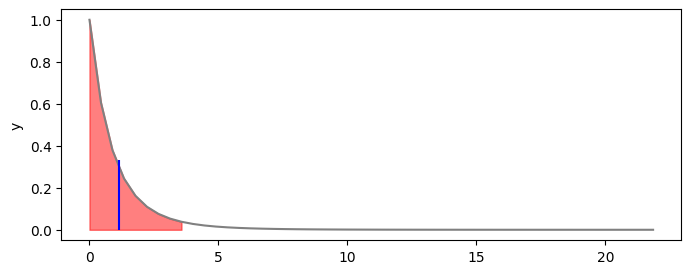

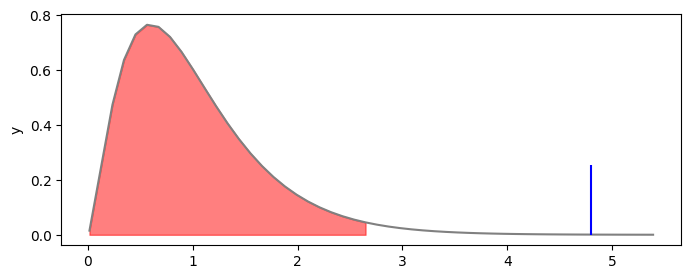

In [24]:
### Komórka testowa
assert np.all(np.isclose(one_way_anova(test_data_3, 0.05), (1.127072228543553, 3.8852938346523946, 0)))
assert np.all(np.isclose(one_way_anova(test_data_4, 0.02), (4.79388401864753, 2.7336800410268243, 1)))

### Zadanie 5: Weryfikacja hipotez z wykorzystaniem dedykowanych funkcji [6 pkt]

#### a) 
Wykorzystaj funkcję `scipy.stats.permutation_test()`, do zwertfikowania hipotezy o równości wartościach przeciętnych populacji z których zostały pobrane próby `test_data_1` i `test_data_2` względem hipotezy alternatywnej, że wartości oczekiwane tych populacji są różne. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Uwagi do wykonania zadania:
 - Podczas obliczeń ustaw wartość argumentu funkcji `scipy.stats.permutation_test()` odpowiadającego za ziarno generatora liczb losowych na 29.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Komórka testowa
assert np.isclose(pvalue_1, 0.0944)
assert H_1 == 1

#### b) 
Wykorzystaj funkcję `scipy.stats.permutation_test()`, do zwertfikowania hipotezy o równości wariancji populacji z których zostały pobrane próby `test_data_1` i `test_data_2` względem hipotezy alternatywnej, że wariacja populacji, z której została pobrana próba `test_data_2` jest wyższa. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Uwagi do wykonania zadania:
 - Automatyczne testy przewidują obliczenie wartości wariancji dla wartości parametru `ddof=1`.
 - Podczas obliczeń ustaw wartość argumentu funkcji `scipy.stats.permutation_test()` odpowiadającego za ziarno generatora liczb losowych na 29.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Komórka testowa
assert np.isclose(pvalue_2, 0.1139)
assert H_2 == 0

#### c)
Korzystając z funkcji `sp.stats.f_oneway()` zweryfikuj hipotezę o równości wartości średnich zmiennych zawartych w zmiennej `test_data_4`. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_3`, oraz przygotuj zmienną `H_3` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - usuń z danych wartości NaN lub ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Komórka testowa
assert np.isclose(pvalue_3, 0.0003333720426864202)
assert H_3 == 1